# スカラー方程式における時間積分法

# 3.2(f) MacCormack法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def init(q1, q2, dx, jmax):
    xs = -1 # 始点
    x = np.linspace(xs, xs + dx * (jmax-1), jmax)
    q = np.array([(float(q1) if i < 0.0 else float(q2)) for i in x])
    return (q, x)

In [3]:
def do_computing_mc(x, q, c, dt, dx, nmax, interval = 2):
    plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 22 # グラフの文字サイズ

    # 初期分布
    plt.plot(x, q, marker='o', lw=2, label='n=0')

    for n in range(1, nmax + 1):
        qbar = q.copy()
        
        # MacCormack法
        for j in range(0, jmax-1):
            qbar[j] = q[j] - dt * c * (q[j+1] - q[j]) / dx
        
        for j in range(1, jmax-1):
            q[j] = 0.5 * ((q[j] + qbar[j]) - dt * c * (qbar[j] - qbar[j-1]) / dx)
        
        # 各ステップの可視化
        if n % interval == 0:
            plt.plot(x, q, marker='o', lw=2, label=f'n={n}')            
            
    # グラフの後処理
    plt.grid(color='black', linestyle='dashed', linewidth=0.5)
    plt.xlim([-1, 1])
    plt.xlabel('x')
    plt.ylabel('q')
    plt.legend()
    plt.show()

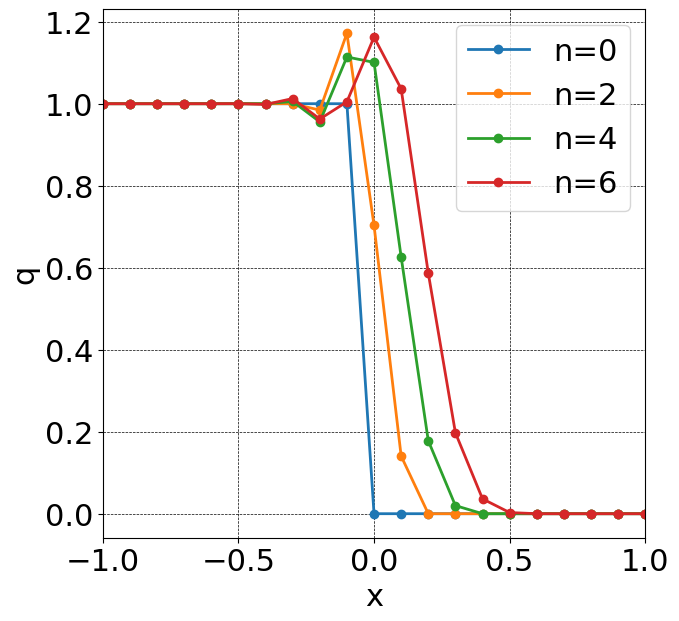

In [4]:
c  = 1
dx = 0.1
dt = 0.05

jmax = 21
nmax = 6

q1 = 1
q2 = 0
q,x = init(q1, q2, dx, jmax)
do_computing_mc(x, q, c, dt, dx, nmax, interval = 2)

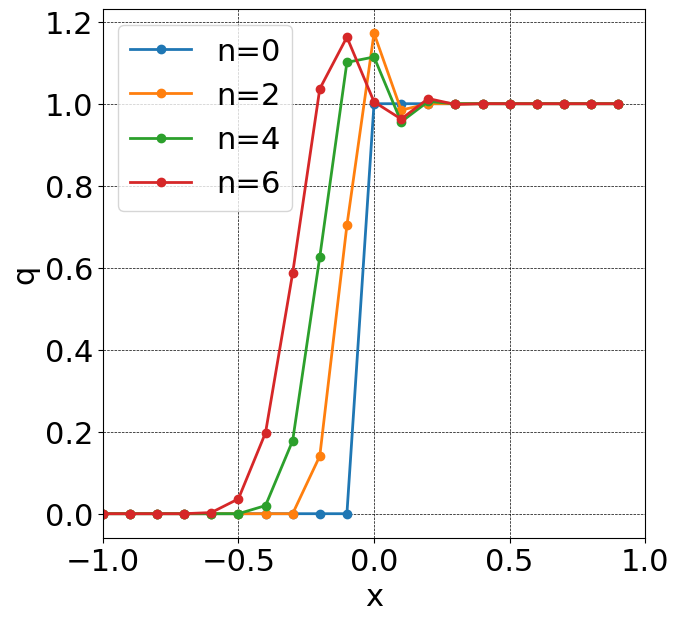

In [5]:
c = -1
dx = 0.1
dt = 0.05

jmax = 20
nmax = 6

q1 = 0
q2 = 1
q,x = init(q1, q2, dx, jmax)
do_computing_mc(x, q, c, dt, dx, nmax, interval = 2)